In [1]:
import pandas as pd

from pathlib import Path
from os import chdir

chdir("/Users/shahrez/Documents/Developer/projects/mclaren_applied")

In [2]:
# Load the data from CSV files
club_data = pd.read_csv(Path.cwd() / 'data/club_data.csv')
planet_data = pd.read_csv(Path.cwd() / 'data/planet_data.csv')
training_data = pd.read_csv(Path.cwd() / 'data/training_data.csv')
test_data = pd.read_csv(Path.cwd() / 'data/test_data.csv')


In [3]:
import math

club_data['initial_ball_speed (m/s)'] = 1.5 * club_data['swing_speed (m/s)']
data = training_data.merge(planet_data, on='planet').merge(club_data, on='club')
t_data = test_data.merge(planet_data, on='planet').merge(club_data, on='club')
# Calculate initial ball speed

def projectile_distance(v, g, deg):
    angle_radians = math.radians(deg)
    return (v**2/g)*math.sin(2*angle_radians)

data['loft_angle (rad)'] = data.apply(lambda row: math.radians(row['loft_angle (deg)']), axis=1)
t_data['loft_angle (rad)'] = t_data.apply(lambda row: math.radians(row['loft_angle (deg)']), axis=1)


# X = merged_data.drop(columns=['club', 'planet_data'])
# y = merged_data['club']  

t_data


,planet,club,shot_distance (m),gravity (m/s^2),air_density (kg/m^3),swing_speed (m/s),loft_angle (deg),initial_ball_speed (m/s),loft_angle (rad)
0,Endor,driver,226.5390,8.34,1.20,50,8,75.0,0.139626
1,Haruun Kal,driver,203.7920,9.61,1.28,50,8,75.0,0.139626
2,Bespin,driver,151.4992,14.72,1.37,50,8,75.0,0.139626
3,Endor,3 wood,223.2954,8.34,1.20,48,12,72.0,0.209440
4,Haruun Kal,3 wood,201.4677,9.61,1.28,48,12,72.0,0.209440
5,Bespin,3 wood,152.7555,14.72,1.37,48,12,72.0,0.209440
6,Endor,5 wood,217.5753,8.34,1.20,46,20,69.0,0.349066
7,Haruun Kal,5 wood,197.3655,9.61,1.28,46,20,69.0,0.349066
8,Bespin,5 wood,154.3749,14.72,1.37,46,20,69.0,0.349066
9,Endor,3 iron,209.2289,8.34,1.20,44,21,66.0,0.366519


In [4]:
import math
def calculate_initial_velocity(swing_speed, loft_angle_deg):
    """
    Calculate the initial velocity of a golf ball based on initial ball speed (m/s) and loft angle (degrees).

    Args:
    - initial_ball_speed (float): Initial ball speed in meters per second (m/s).
    - loft_angle_deg (float): Loft angle in degrees.

    Returns:
    - initial_velocity (float): Initial velocity of the golf ball in meters per second (m/s).
    """
    # Convert loft angle from degrees to radians
    loft_angle_rad = math.radians(loft_angle_deg)
    
    # Calculate initial velocity using the provided equation
    initial_velocity = 1.5 * swing_speed * (1 + math.sin(loft_angle_rad))
    
    return initial_velocity

def projectile_distance(v, g, deg):
    angle_radians = math.radians(deg)
    return ((v**2)*math.sin(2*angle_radians))/g

data['initial_velocity'] = data.apply(lambda row: calculate_initial_velocity(row['swing_speed (m/s)'], row['loft_angle (deg)']), axis=1)
t_data['initial_velocity'] = t_data.apply(lambda row: calculate_initial_velocity(row['swing_speed (m/s)'], row['loft_angle (deg)']), axis=1)


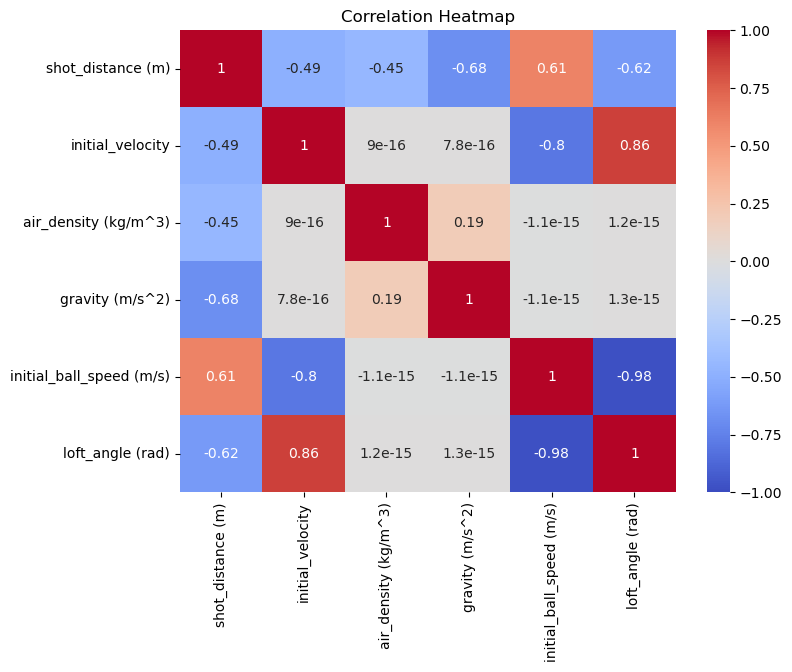

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data[['shot_distance (m)','initial_velocity', 'air_density (kg/m^3)','gravity (m/s^2)', 'initial_ball_speed (m/s)','loft_angle (rad)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

X_test = t_data[['initial_velocity', 'air_density (kg/m^3)','gravity (m/s^2)', 'initial_ball_speed (m/s)','loft_angle (rad)']]
X_train = data[['initial_velocity', 'air_density (kg/m^3)','gravity (m/s^2)', 'initial_ball_speed (m/s)','loft_angle (rad)']]
y_test = t_data['shot_distance (m)']
y_train = data['shot_distance (m)']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


layers = keras.layers

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer, predicting shot distance
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


test_features_standardized = scaler.transform(X_test)

# Use the trained model to make predictions on the testing data
predicted_distances = model.predict(X_test)

predicted_distances


Epoch 1/50
2/2 [==============================] - 0s 71ms/step - loss: 32295.7949 - val_loss: 31830.0195
Epoch 2/50
2/2 [==============================] - 0s 13ms/step - loss: 32256.4805 - val_loss: 31792.0312
Epoch 3/50
2/2 [==============================] - 0s 22ms/step - loss: 32218.5527 - val_loss: 31754.1602
Epoch 4/50
2/2 [==============================] - 0s 13ms/step - loss: 32179.4434 - val_loss: 31715.9668
Epoch 5/50
2/2 [==============================] - 0s 13ms/step - loss: 32142.2539 - val_loss: 31677.3828
Epoch 6/50
2/2 [==============================] - 0s 12ms/step - loss: 32102.4922 - val_loss: 31638.0059
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 32062.0293 - val_loss: 31598.1523
Epoch 8/50
2/2 [==============================] - 0s 12ms/step - loss: 32021.3340 - val_loss: 31557.3594
Epoch 9/50
2/2 [==============================] - 0s 12ms/step - loss: 31981.1797 - val_loss: 31515.2832
Epoch 10/50
2/2 [==============================] - 0s 1

array([[406.8002 ],
       [405.5274 ],
       [402.1673 ],
       [403.76602],
       [402.62698],
       [398.95883],
       [415.1514 ],
       [414.25665],
       [411.04126],
       [400.57153],
       [399.65472],
       [396.33768],
       [398.76324],
       [397.50775],
       [394.13617],
       [396.77597],
       [395.4549 ],
       [391.98566],
       [394.31918],
       [392.9981 ],
       [389.45117],
       [398.0926 ],
       [396.77148],
       [393.69977],
       [400.64944],
       [399.71075],
       [397.01526],
       [402.45132],
       [401.73105],
       [399.03555],
       [403.16675],
       [402.44647],
       [399.75095]], dtype=float32)

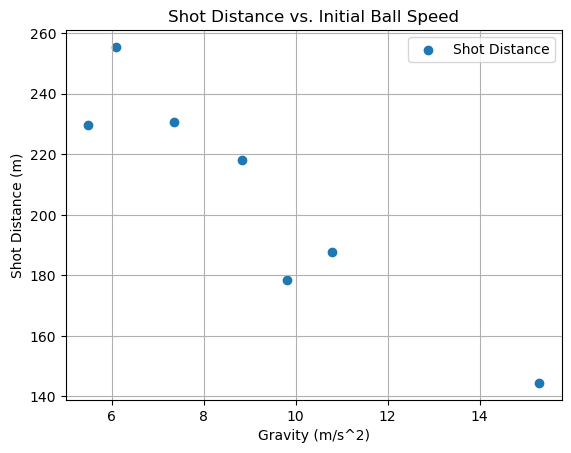

In [7]:
def plot_shot_distances(speed_values, shot_distances):
    """
    Create a line plot of shot distances based on gravity and initial ball speed.

    Parameters:
    - gravity_values (list or numpy array): List of gravity values.
    - speed_values (list or numpy array): List of initial ball speed values.
    - shot_distances (numpy array): Shot distances corresponding to gravity and speed values.
    """

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Plot the shot distances as a line plot
    ax.scatter(speed_values, shot_distances, label='Shot Distance', marker='o')

    # Set labels for the axes
    ax.set_xlabel('Gravity (m/s^2)')
    ax.set_ylabel('Shot Distance (m)')

    # Add a legend to the plot
    ax.legend()

    # Set the title of the plot
    ax.set_title('Shot Distance vs. Initial Ball Speed')

    # Show the plot
    plt.grid(True)
    plt.show()
    
plot_shot_distances(data['gravity (m/s^2)'][data['club']=='driver'],data['shot_distance (m)'][data['club']=='driver'])

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_clf = Pipeline([
            # ("scaler", StandardScaler()),
            ("linear_svc", SVR(kernel='linear'),)
        ])

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

y_pred
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(mse, r2)

/Users/shahrez/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([421.52619845, 396.71586245, 299.42158958, 391.69192632,
       366.88159032, 269.58731745, 350.8273558 , 326.0170198 ,
       228.72274693, 332.79827692, 307.98794092, 210.69366805,
       319.68095482, 294.87061882, 197.57634595, 306.88309503,
       282.07275903, 184.77848616, 294.40531858, 269.59498258,
       172.30070971, 277.32402139, 252.5136854 , 155.21941252,
       261.07212622, 236.26179022, 138.96751735, 245.66211321,
       220.85177722, 123.55750434, 231.10026149, 206.2899255 ,
       108.99565262])

In [20]:
data = training_data.merge(planet_data, on='planet').merge(club_data, on='club', how='right')

data

,planet,club,shot_distance (m),gravity (m/s^2),air_density (kg/m^3),swing_speed (m/s),loft_angle (deg),initial_ball_speed (m/s)
0,Polis Massa,driver,229.7712,5.49,1.55,50,8,75.0
1,Trandosha,driver,255.4600,6.08,1.25,50,8,75.0
2,Felucia,driver,230.6538,7.36,1.30,50,8,75.0
3,Geonosis,driver,218.1139,8.83,1.22,50,8,75.0
4,Tatooine,driver,178.3659,9.81,1.64,50,8,75.0
...,...,...,...,...,...,...,...,...
72,Felucia,pw,148.7950,7.36,1.30,37,43,55.5
73,Geonosis,pw,146.4156,8.83,1.22,37,43,55.5
74,Tatooine,pw,116.0442,9.81,1.64,37,43,55.5
75,Hoth,pw,128.6305,10.79,1.33,37,43,55.5
